
# Neural networks can get an approximation that is as good as we want of any function. 
## Universality theorem
I recently started to read the book Deep Learning, by Ian Goodfellow, Yoshua Bengio and Aaron Courville (https://www.deeplearningbook.org). I read something that really got my attention: neural networks can compute any function. So, no matter the function, there is a guaranteed to be a neural network so that for every possible input, x, the value f(x) (or some close approximations) is output from the network.

Researching a little further, I saw that one of the caveats of this is the class of the functions which can be approximated. And are the continuous ones. However, it seems a continuous approximations of a discontinuous function is often good enough.

I came across a brilliant explanation about the theorem, by Michael Nielsen here: http://neuralnetworksanddeeplearning.com/chap4.html.

Awesome opportunity to try for the first time pytorch, with the following thought: 
How will the universal approximation theory apply to a function of own choice?

In the example, we will start with network with one hidden layer of six neurons. If it not enough, we can increase the number of hidden neurons to improve the approximation.


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

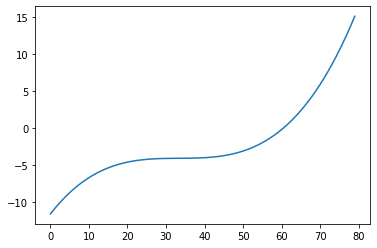

In [ ]:
# Generate Data
def create_function(x):
    return 0.2*(x**3) + 0.4*(x**2) + 0.3*x -4

def get_data(start, end, step_size):
    x = np.arange(start, end, step_size)
    x.shape = (len(x), 1)
    y = np.array([create_function(x[i]) for i in range(len(x))])
    y.shape = (len(y), 1)
    return x,y

# Visualize
x,y = get_data(-4,4,.1)
plt.plot(y)
plt.show()

In [ ]:
x_torch = torch.from_numpy(x).float()
y_torch = torch.from_numpy(y).float()

In [ ]:
# Inspired by pytorch tutorial
# D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
D_in, H, D_out = 1, 6, 1

# Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# Use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(10000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x_torch)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the loss.
    loss = loss_fn(y_pred, y_torch)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    

99 305.4406433105469
199 165.0032958984375
299 115.18085479736328
399 89.78775024414062
499 75.59608459472656
599 66.83597564697266
699 60.483131408691406
799 55.186012268066406
899 50.31221008300781
999 45.50109100341797
1099 40.42466735839844
1199 35.48338317871094
1299 30.56759262084961
1399 26.206838607788086
1499 22.606075286865234
1599 19.51850128173828
1699 16.991884231567383
1799 14.987051010131836
1899 13.369357109069824
1999 12.07308578491211
2099 11.017345428466797
2199 10.165821075439453
2299 9.300320625305176
2399 8.595320701599121
2499 8.0493745803833
2599 7.622456073760986
2699 7.227622985839844
2799 6.9176025390625
2899 6.673670768737793
2999 6.482766151428223
3099 6.334165573120117
3199 6.156526565551758
3299 6.012863636016846
3399 5.89858341217041
3499 5.807354927062988
3599 5.73476505279541
3699 5.677084922790527
3799 5.631344318389893
3899 5.576394081115723
3999 5.537309169769287
4099 5.460411071777344
4199 5.395374774932861
4299 5.345731258392334
4399 5.19045495986

In [ ]:
model[2].weight

Parameter containing:
tensor([[-1.0855, -3.1114,  2.1470,  3.8786, -0.9447,  0.3719]],
       requires_grad=True)

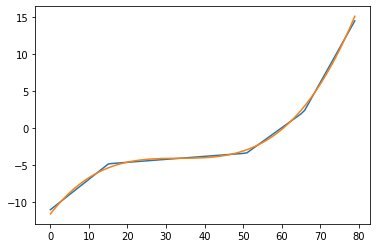

In [ ]:
plt.plot(y)
plt.plot(y_pred.data.numpy())
plt.show()